# Small World Networks 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

g = nx.Graph()
ng = nx.Graph()

In [2]:
#Creating a Regular Ring Lattice
# k should be an even number 
def ring(n,k):
        print ("Graph Created")
        global g
        global nodes
        nodes = range(1,n+1)
        g.add_nodes_from(nodes)
        for j in range(int(k/2)):
                for i in nodes:
                        if i+1+j <= n:
                                g.add_edge(i,i+1+j)
                        else:
                                g.add_edge(i,n-i+j+1)
                        if i-1-j >=1:
                                g.add_edge(i,i-1-j)
                        else:
                                g.add_edge(i,n-j+1-i)
        nx.draw_circular(g)
        

## Generating connected small world networks from ring lattices 

In [ ]:
# Rewiring Algorithm
def rewiring(g,p):
    #g is the graph and p is probability of rewiring each edge
    global ng
    ng = g
    for i in ng.edges():
        pcomp = rnd.random()
        if pcomp > p:
            pass
        else:
            nodes = list(ng.nodes())
            while True:
                nedge = rnd.sample(nodes,1)
                if ng.has_edge(i[0],nedge[0]):
                    continue
                else:
                    ng.remove_edge(i[0],i[1])
                    ng.add_edge(i[0],nedge[0])
                    if nx.is_connected(ng) == True:
                        break
                    else:
                        ng.remove_edge(i[0],nedge[0])
                        ng.add_edge(i[0],i[1])
                        break 
    nx.draw_circular(g)

In [4]:
#Small World Network Characteristics
plist = [0.0001,0.0004,0.0006,0.0007,0.001,0.003,0.007,0.01,0.03,0.06,0.09,0.1,0.3,0.7,0.9]
n = 1000
k = 10
rep = 1
for i in plist:
    for i in range(rep-1):
        plist.append(i)
clist = []
pllist = []

Graph Created
Wall time: 2min 3s


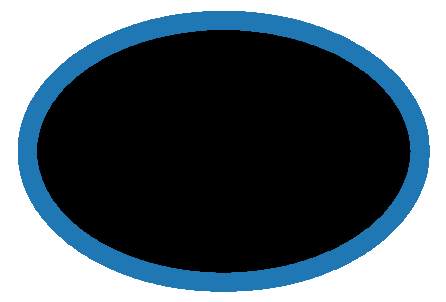

In [5]:
%%time
ring (n,k)
c0 = nx.average_clustering(g)
p0 = nx.average_shortest_path_length(g)
for i in plist:
    rewiring(g,i)
    #path length
    pl = nx.average_shortest_path_length(ng)
    pllist.append(pl/p0)
    #clustering coefficient 
    cc = nx.average_clustering(ng)
    clist.append(cc/c0)

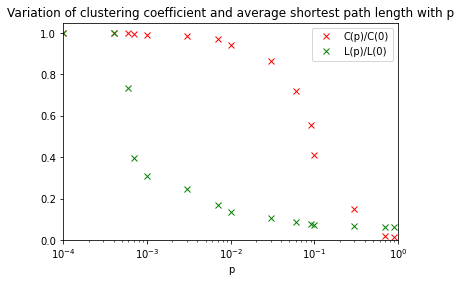

In [6]:
#plotting the graph
plt.plot(plist, clist, 'rx', label = "C(p)/C(0)")
plt.plot(plist, pllist, 'gx', label = "L(p)/L(0)")
plt.title('Variation of clustering coefficient and average shortest path length with p')
plt.xlabel('p')
plt.xscale('log')
plt.xlim(0.0001,1)
plt.ylim(0,1.05)
plt.legend()
plt.show()

Graph Created


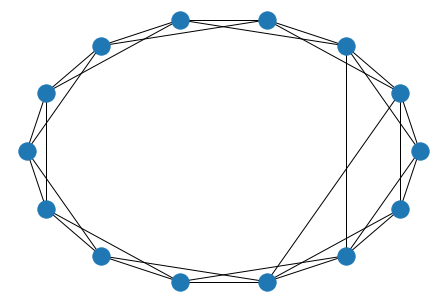

In [7]:
g = nx.Graph()
ring(14,4)

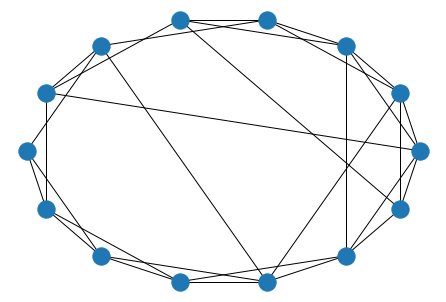

In [8]:
rewiring(g, 0.1)

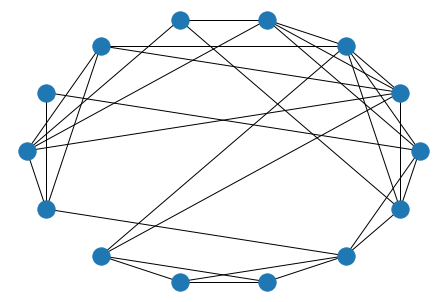

In [9]:
rewiring(g, 0.6)

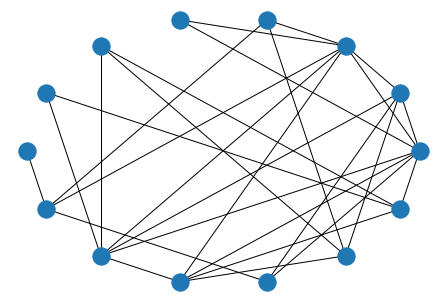

In [10]:
rewiring(g, 1)